# 01 - Generating random data and Kmeans Clustering in Python
This week we are going to learn how to perform cluster analysis in Python. But before that, let's generate some random data in Python, and learn some Python along the way! After that, we will perform cluster analysis on the random data to better understand how cluster analysis works and its limitations.

### Why should I care about generating random data?
Great question! We all want to perform analysis on *real* data to solve *real* problems, but when we perform analysis we always need to be aware of the limitations of the analysis method we are using and the risks of generalising or taking actions based on the results. This is where "random" or "toy" data can be useful. Firstly, it enables us to generate some data for which we have a good understanding of the process generating the data, and this enables us to evaluate an analysis method based on how well it models the underlying process. Secondly, we can easily tweak and change the toy data to become a dataset where the analysis method fails, and this enables us to easily compare the strengths and weaknesses of different analysis methods. Thirdly, it is just a good way to learn and to understand how an analysis method works for a very simple dataset and problem, and this provides us with a strong foundation of understanding to start exploring and developing models for more complex datasets and problems.
<img src="../images/data.jpg" width=400 height=400 />

## First, let's make some blobs!
Using the code below we are going to create some *2-Dimensional* random data and visualise it in a *scatter plot*. 

We will do this in three steps:
1. Import the required packages.
2. Generate some data.
3. Visualise the data.

<img src="../images/simples.jpg" width=200 height=200 />

### 1. Import the required packages
Run the code below to import the required packages.

In [1]:
# Import the 'make_blobs' function from the 'sklearn' package to generate some data
from sklearn.datasets import make_blobs

# Import the 'matplotlib.pyplot' package so we can visualise the data
import matplotlib.pyplot as plt

### 2. Generate some data
Run the code below to generate some data.

In [2]:
# Specify how many data points (A.K.A. "samples" or "examples") we want in our data
n_samples = 1500

# Create some data X and some labels y
X_data, y_labels = make_blobs(n_samples=n_samples)

### 3. Visualise the data
Run the code below to generate some data.

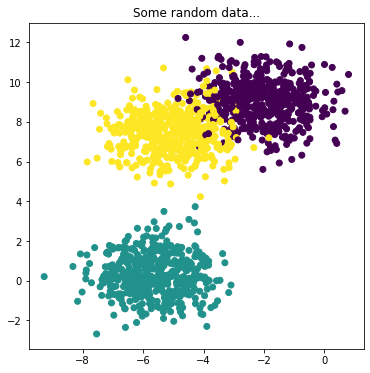

In [3]:
# Create a 'figure'
plt.figure(figsize=(6, 6))

# Create a scatter plot
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_labels)

# Give the scatter plot a title
plt.title("Some random data...")

# Show the scatter plot
plt.show()

### Side task 1 to advance your Python skills
You can skip these tasks if you think you are a Python pro. If not, update the code below to:
1. Change the figure title to be "Some toy data..."
2. Change the figure size to be 8 x 8 (who doesn't like big images?)
3. Change the scatter plot to show the same data, but with the axes swapped

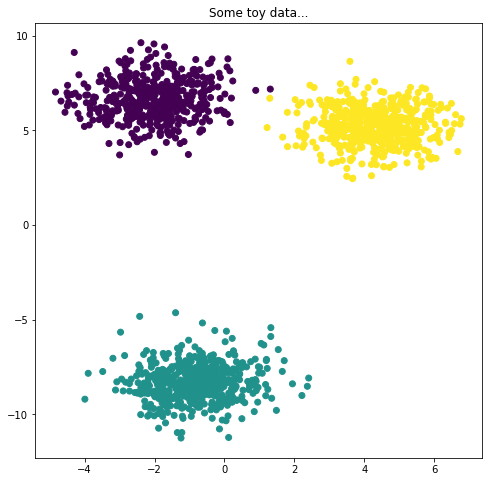

In [8]:
# Update this code...
plt.figure(figsize=(8, 8))
plt.scatter(X_data[:, 1], X_data[:, 0], c=y_labels)
plt.title("Some toy data...")
plt.show()

## Let's make a gallery of blobs!
Let's now create a gallery of blobs so that we can see multiple sets of random data at the same time and consider how particular characteristics of the data might impact the results of cluster analysis.

Run the code below to create a gallery of multiple random datasets.

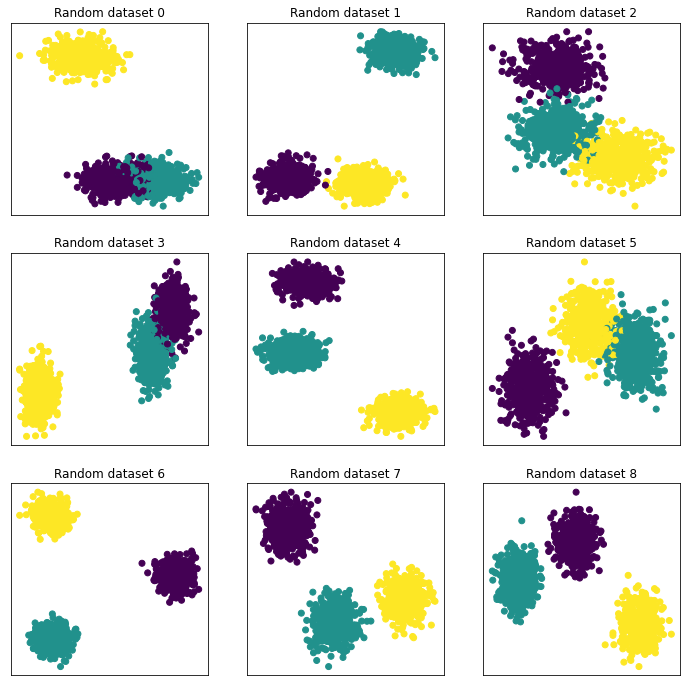

In [14]:
plt.figure(figsize=(12, 12))

n_samples = 1500
gallery_width = 3
gallery_height = 3

for i in range(gallery_width*gallery_height):
    # Generate some data
    X_data, y_labels = make_blobs(n_samples=n_samples)
    
    # Visualise the data (in a sub-plot)
    plt.subplot(gallery_height,gallery_width,i+1)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_labels)
    plt.title(f"Random dataset {i}")
    plt.xticks([])
    plt.yticks([])

plt.show()

### Questions 1 to help develop your understanding
1. How do these datasets differ? What makes one dataset similar or different to another?
2. Given a random datapoint without a colour/label: (2a) when would it be easy to guess the colour/label of the datapoint? (2b) when would it be difficult to guess the colour/label of the datapoint?

### Side task 2 to advance your Python skills
1. What do you think `plt.xticks` and `plt.yticks` do? Remove them and run the code again and see if you can tell then. Are they needed?
2. How do you think `plt.subplot` works? If you think you know, then update the code to create a 3x3 or 5x5 gallery of random datasets?

## Let perform some cluster analysis!
OK, enough playing around, let's perform some serious cluster analysis :)

To do this, we are going to use the `KMeans` [method](https://en.wikipedia.org/wiki/K-means_clustering) from the `sklearn.cluster` package (which we will need to import). The code below is the same as above, but we are going to use the `KMeans` method to try to predict the labels of the data. I.e., we will pretend to not have access to the labels of the data, like with most real datasets. We will then visualise the data using the *predicted* labels (`y_predicted`) instead of the original labels (`y_label`).

Run the code below.

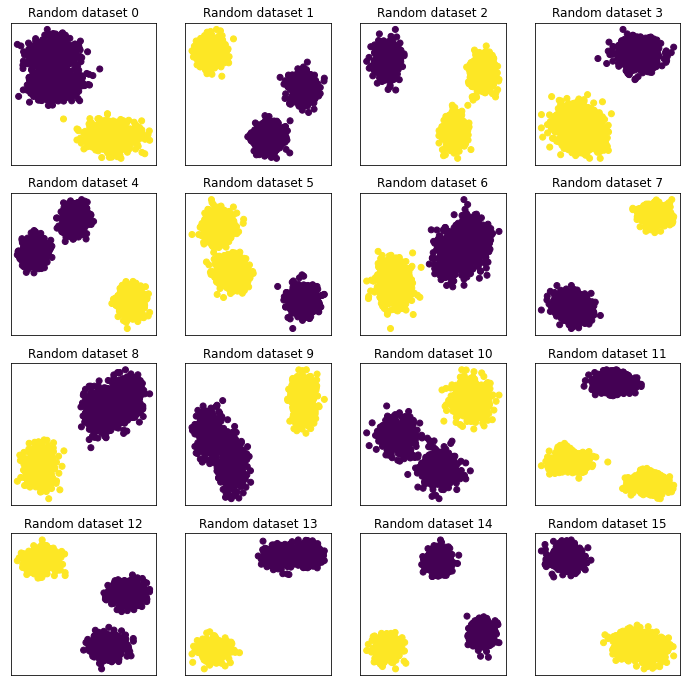

In [15]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 12))

n_samples = 1500
gallery_width = 4
gallery_height = 4

for i in range(gallery_width*gallery_height):
    # Generate some data
    X_data, y_labels = make_blobs(n_samples=n_samples)
    
    # !!! PERFORM CLUSTER ANALYSIS !!!
    y_predicted = KMeans(n_clusters=2).fit_predict(X_data)
    
    # Visualise the unlabelled data and the *predicted* labels
    plt.subplot(gallery_height,gallery_width,i+1)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_predicted)
    plt.title(f"Random dataset {i}")
    plt.xticks([])
    plt.yticks([])

plt.show()

### Question 2 to help develop your understanding
1. How do the results look? 
2. What's wrong with the code above? How could it be improved?
3. What do you think the parameter `n_clusters` represents?

### Task 3 to improve your analytics skills
1. Set `n_clusters` in the code to a value you think makes most sense.
2. For which datasets do you think `KMeans` is more/less successful? Explain why.
3. Try increasing `n_clusters` beyond this number and explain what happens.

## Example of Kmeans Clustering

The file Shoe Sales Clusters.csv contains data on 3000 transactions made by 250 customers. (See Figure 17.29.) Each transaction is for a dollar amount spent on one of five categories of shoes: athletic, dress, work, casual, or sandal. The goal is to find clusters of customers who have similar buying behavior.

In [8]:
# Assessing the data sample of Shoe Sales Cluster.csv
# Creating the dummy variables for the categories of shoes

import pandas as pd
df = pd.read_csv('../data/Shoe Sales Clusters.csv')
df = pd.get_dummies(df, columns=['Type'])
df.head()

,Transaction,CustID,Spent,Type_Athletic,Type_Casual,Type_Dress,Type_Sandal,Type_Work
0,1,210,29,0,0,0,1,0
1,2,7,74,0,0,0,0,1
2,3,220,134,0,0,1,0,0
3,4,93,150,1,0,0,0,0
4,5,66,168,1,0,0,0,0


In [11]:
# We want to cluster customers, not transactions, 
# So we need to transform the data set in Pivot table, where each row is a transaction, to a data set where each row is a customer.

pivot = df.pivot_table(index=['CustID'], values=['Type_Athletic','Type_Casual','Type_Dress','Type_Sandal','Type_Work'], aggfunc='sum')
print(pivot)

        Type_Athletic  Type_Casual  Type_Dress  Type_Sandal  Type_Work
CustID                                                                
1                  10            2           2            1          1
2                   0            7           1            3          1
3                   0            1           9            0          0
4                   9            5           0            0          0
5                   9            2           0            1          2
...               ...          ...         ...          ...        ...
246                 0            5           2            1          2
247                 1            2           2            2          4
248                 0            4           4            3          0
249                 1            7           0            5          0
250                 1            5           0            0          8

[250 rows x 5 columns]


In [10]:
## Setting up the Kmeans analysis

from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=4)
kmeans.fit(pivot)

# Adding the cluster label to the observation
pivot['cluster'] = kmeans.labels_
pivot.head()

,Type_Athletic,Type_Casual,Type_Dress,Type_Sandal,Type_Sandal,Type_Work,cluster
CustID,,,,,,,
1,10,2,2,1,1,1,2
2,0,7,1,3,3,1,1
3,0,1,9,0,0,0,3
4,9,5,0,0,0,0,2
5,9,2,0,1,1,2,2


         Type_Athletic  Type_Casual  Type_Dress  Type_Sandal  Type_Sandal  \
cluster                                                                     
0                368.0        125.0        43.0         33.0         33.0   
1                 39.0        307.0        83.0        247.0        247.0   
2                 49.0        181.0       465.0        155.0        155.0   
3                 31.0        219.0        71.0         40.0         40.0   

         Type_Work  
cluster             
0             30.0  
1             44.0  
2             44.0  
3            426.0  


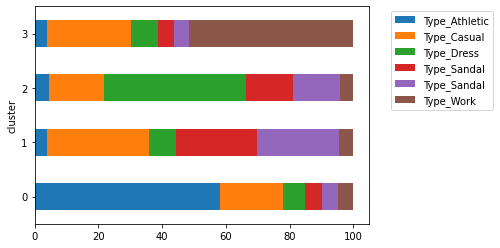

In [7]:
# Visualising the importance of attributes in each cluster group
pivot_cluster = pivot.pivot_table(index=['cluster'], values=['Type_Athletic','Type_Casual','Type_Dress','Type_Sandal','Type_Sandal','Type_Work'], aggfunc='sum')
print(pivot_cluster)

# Creating stack plots for each cluster group by percentages
import matplotlib.pyplot as plt
plot_cluster_percentage = pivot_cluster.div(pivot_cluster.sum(axis=1), axis=0)*100
plot_cluster_percentage
plot_cluster_percentage.plot(kind='barh', stacked=True)
plt.legend(plot_cluster_percentage, bbox_to_anchor=(1.05,1))